In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import *
from numpy import *
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
#     return plt.get_cmap(name)
cmaps = get_cmap(12, 'Paired')

# plt.style.use('ggplot')
font = {'family' : 'Times New Roman',
        'size'   : 11}
plt.rc('lines', linewidth=2, markersize=1)
plt.rc('font', **font)
plt.rc('grid', c='0.8', ls='-', lw=0.5)
# plt.rc('axes', axisbelow=True)
plt.rcParams['axes.axisbelow'] = True
params = {'axes.grid': True, 'axes.labelsize': 11,'axes.titlesize': 11, 'font.size': 11, 'legend.fontsize': 11, 'xtick.labelsize': 11, 'ytick.labelsize': 11}

plt.rcParams.update(params)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        


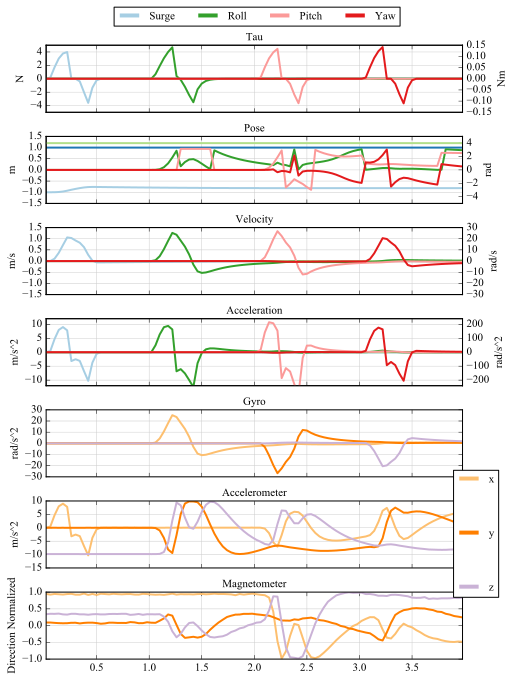

In [119]:
directions = ['Surge', 'Roll', 'Pitch', 'Yaw']


Pitch = '20'
Diameter = '30'
# JUsed = 'Real' #Real or Ideal
fig_dynamics_sensor_response, axes = plt.subplots(7,1, figsize=(7,9), linewidth=1.5)

plt.setp(axes, xticks=arange(0,5,.5))

# axes[0,1].yaxis.set_label_position("right")
# axes[1,1].yaxis.set_label_position("right")

ax00 = axes[0]
ax01 = axes[0].twinx()

ax10 = axes[1]
ax11 = axes[1].twinx()

ax20 = axes[2]
ax21 = axes[2].twinx()

ax30 = axes[3]
ax31 = axes[3].twinx()

ax40 = axes[4]
ax50 = axes[5]
ax60 = axes[6]

# Axes 00 - Tau
ax00.set_ylim([-5,5])
ax01.set_ylim([-0.15,0.15])
ax00.set_ylabel('N')
ax01.set_ylabel('Nm')
ax00.tick_params(axis='x', labelbottom=False)
ax00.set_title('Tau')
ax00.grid(zorder=0)
ax01.grid(False)

# Axes 01 - Pos
ax10.set_ylim([-1.5,1.5])
ax11.set_ylim([-5,5])
ax10.set_ylabel('m')
ax11.set_ylabel('rad')
ax10.tick_params(axis='x', labelbottom=False)
ax11.tick_params(axis='x', labelbottom=False)
ax10.set_title('Pose')
ax10.grid(zorder=0)
ax11.grid(False)

# Axes 02 - Vel
# ax20.set_ylim([-1.5,1.5])
ax20.set_ylim([-1.5,1.5])
ax21.set_ylim([-30,30])
ax20.set_ylabel('m/s')
ax21.set_ylabel('rad/s')
ax20.tick_params(axis='x', labelbottom=False)
ax21.tick_params(axis='x', labelbottom=False)
ax20.set_title('Velocity')
ax20.grid(zorder=0)
ax21.grid(False)

# Axes 03 - Acc
# ax20.set_ylim([-1.5,1.5])
ax30.set_ylim([-12,12])
ax31.set_ylim([-240,240])
ax30.set_ylabel('m/s^2')
ax31.set_ylabel('rad/s^2')
ax30.tick_params(axis='x', labelbottom=False)
ax31.tick_params(axis='x', labelbottom=False)
ax30.set_title('Acceleration')
ax30.grid(zorder=0)
ax31.grid(False)

# Axes 04 - Gyro
ax40.set_ylabel('rad/s^2')
ax40.tick_params(axis='x', labelbottom=False)
ax40.set_title('Gyro')
ax40.grid(zorder=0)

# Axes 04 - Accelerometer
ax50.set_ylabel('m/s^2')
ax50.tick_params(axis='x', labelbottom=False)
ax50.set_title('Accelerometer')
ax50.grid(zorder=0)

# Axes 04 - Mag
ax60.set_ylabel('Direction Normalized')
ax60.set_title('Magnetometer')
ax60.grid(zorder=0)


Dir = 'Mixed'
    
data_ts_real = pd.read_pickle('Pickles/Dynamics_with_sensor/' + 'Dynamics_30D_20P_RealJ_TimeSeries_' + Dir +'Only_wsensor' )
error_ls = '--'
force_tau_tags = ['tau1', 'tau2', 'tau3']
torque_tau_tags = ['tau4', 'tau5', 'tau6']

pos_tag = ['p.x', 'p.y', 'p.z', 'att.x', 'att.y', 'att.z']
vel_tag = ['v.x', 'v.y', 'v.z','v.r', 'v.p', 'v.yaw']
acc_tag = ['vdot.x', 'vdot.y', 'vdot.z','vdot.r', 'vdot.p', 'vdot.yaw']

gyro_tags = ['gyro.x','gyro.y','gyro.z']
accelerometer_tags = ['acc.x','acc.y','acc.z']
mag_tags = ['mag.x','mag.y','mag.z']

## AX00
for idx, tag in enumerate(force_tau_tags):
    ax00.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))
for idx, tag in enumerate(torque_tau_tags):
    ax01.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx+3))

## AX01
for idx, tag in enumerate(pos_tag):
    if idx < 2:
        ax10.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))
    else:
        ax11.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))

## AX02
for idx, tag in enumerate(vel_tag):
    if idx < 2:
        ax20.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))
    else:
        ax21.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))

## AX03
for idx, tag in enumerate(acc_tag):
    if idx < 2:
        ax30.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))
    else:
        ax31.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx))

for idx, tag in enumerate(gyro_tags):
    ax40.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx+6))
        
for idx, tag in enumerate(accelerometer_tags):
    ax50.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx+6))
    
for idx, tag in enumerate(mag_tags):
    ax60.plot(data_ts_real.index/1000, data_ts_real[tag], c=cmaps(idx+6))
    
    
custom_lines = [Line2D([0], [0], color=cmaps(0), lw=4),
                Line2D([0], [0], color=cmaps(3), lw=4),
                Line2D([0], [0], color=cmaps(4), lw=4), 
                Line2D([0], [0], color=cmaps(5), lw=4), 
                Line2D([0], [0], color='k', lw=4), 
                Line2D([0], [0],ls=error_ls, color='k', lw=4)]

custom_lines2 = [Line2D([0], [0], color=cmaps(6), lw=4),
                Line2D([0], [0], color=cmaps(7), lw=4),
                Line2D([0], [0], color=cmaps(8), lw=4)]

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.2)
ax00.legend(custom_lines, ['Surge', 'Roll', 'Pitch', 'Yaw'], loc=2, ncol=4, bbox_to_anchor=(0.15,1.65))


ax60.legend(custom_lines2, ['x', 'y', 'z'], loc=1, ncol=1, bbox_to_anchor=(1.1,2.9), labelspacing=4)


In [113]:
fig_dynamics_sensor_response.savefig('Dynamic_Simulation_Step_Response_Mixed_BangBang_Sensor.pdf', edgecolor='0.5', bbox_inches='tight')